<a href="https://colab.research.google.com/github/voltej/lectures/blob/main/Causal_structure_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [6]:
#!pip install pandas numpy scipy networkx matplotlib

In [9]:
import pandas as pd
import numpy as np
import scipy.stats
import itertools
import networkx as nx
import matplotlib.pyplot as plt
from io import StringIO

# Load data

## Variables 
Age (A): The age of an individual.

Gender (S): An individual’s reported gender.

Education (E): The highest level of education or training completed by an individual.

Occupation (O): An individual's employment status.

Residence (R): The size of the city the individual lives in.

Travel (T): The means of transport favored by the individual.


In [7]:
survey_url = "https://raw.githubusercontent.com/altdeep/causalML/master/datasets/transportation_survey.csv"
data = pd.read_csv(survey_url)
print(data)     

         A  S     E    O      R      T
0    adult  F  high  emp  small  train
1    young  M  high  emp    big    car
2    adult  M   uni  emp    big  other
3      old  F   uni  emp    big    car
4    young  F   uni  emp    big    car
..     ... ..   ...  ...    ...    ...
495  young  M  high  emp    big  other
496  adult  M  high  emp    big    car
497  young  M  high  emp  small  train
498  young  M  high  emp  small    car
499  adult  M  high  emp  small  other

[500 rows x 6 columns]


# PC Algorithm

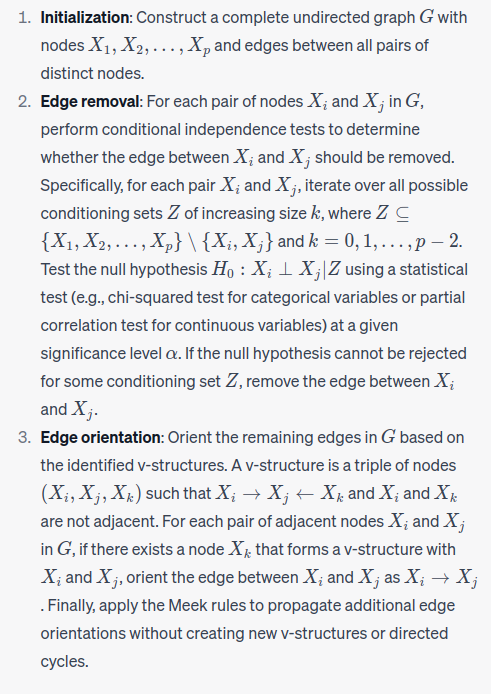

In [19]:
def pc_algorithm(data, target, alpha):
    # Step 1: Initialize the complete undirected graph
    nodes = data.columns.tolist()
    nodes.remove(target)  # Only consider relationships with the target variable
    graph = nx.DiGraph()
    graph.add_nodes_from(nodes)
    graph.add_edges_from([(i, target) for i in nodes])

    # Step 2: Remove edges based on conditional independence tests
    for i in nodes:
        conditioning_set = [k for k in nodes if k != i]
        for k in range(len(conditioning_set) + 1):
            for subset in itertools.combinations(conditioning_set, k):
                grouped_data = data.groupby(list(subset) + [i, target]).size().unstack(fill_value=0)
                if grouped_data.shape[0] > 1 and grouped_data.shape[1] > 1:
                    p_value = scipy.stats.chi2_contingency(grouped_data)[1]
                    if p_value >= alpha:
                        graph.remove_edge(i, target)
                        break
            if not graph.has_edge(i, target):
                break

    return graph




In [24]:
# Apply the algorithm on the dataset
alpha = 0.05  # Significance level for conditional independence tests
target = 'T'
causal_graph = pc_algorithm(data, target, alpha)


# Vizualize the results

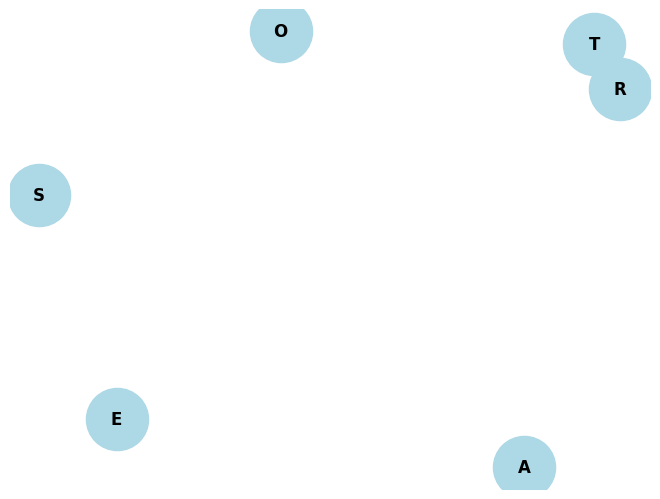

In [18]:
def visualize_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12, font_weight='bold')
    plt.show()


# Visualize the causal graph
visualize_graph(causal_graph)